In [5]:
from graphnics import *
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
#from vasomotion import *
from utils import *
import seaborn as sns
sns.set_style('white')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


In [6]:
ws = [1]
freqs = [get_freq(w) for w in ws]
lamdas = [1, 2, 10]
ks = [get_k(lamda) for lamda in lamdas]

eps = 0.05
beta = 3
n_cycles = 30
tsteps_per_cycle = 20


In [7]:
def f(l):
    return 1/l*(0.5 - (1-np.cos(l))/l**2)




In [8]:
L_mice = 10 #mm, mice
L_human = 150 #mm, human
L_rat = 20 # mm, rat

lamda_vaso_mice = 4 #mm
lamda_vaso_rat = 1 #mm

lamda_pulse_human = 2204
lamda_pulse_rat = 100

lamda_non_REM_vlf = 1.33 #mm
lamda_non_REM_lf = 0.4 #mm

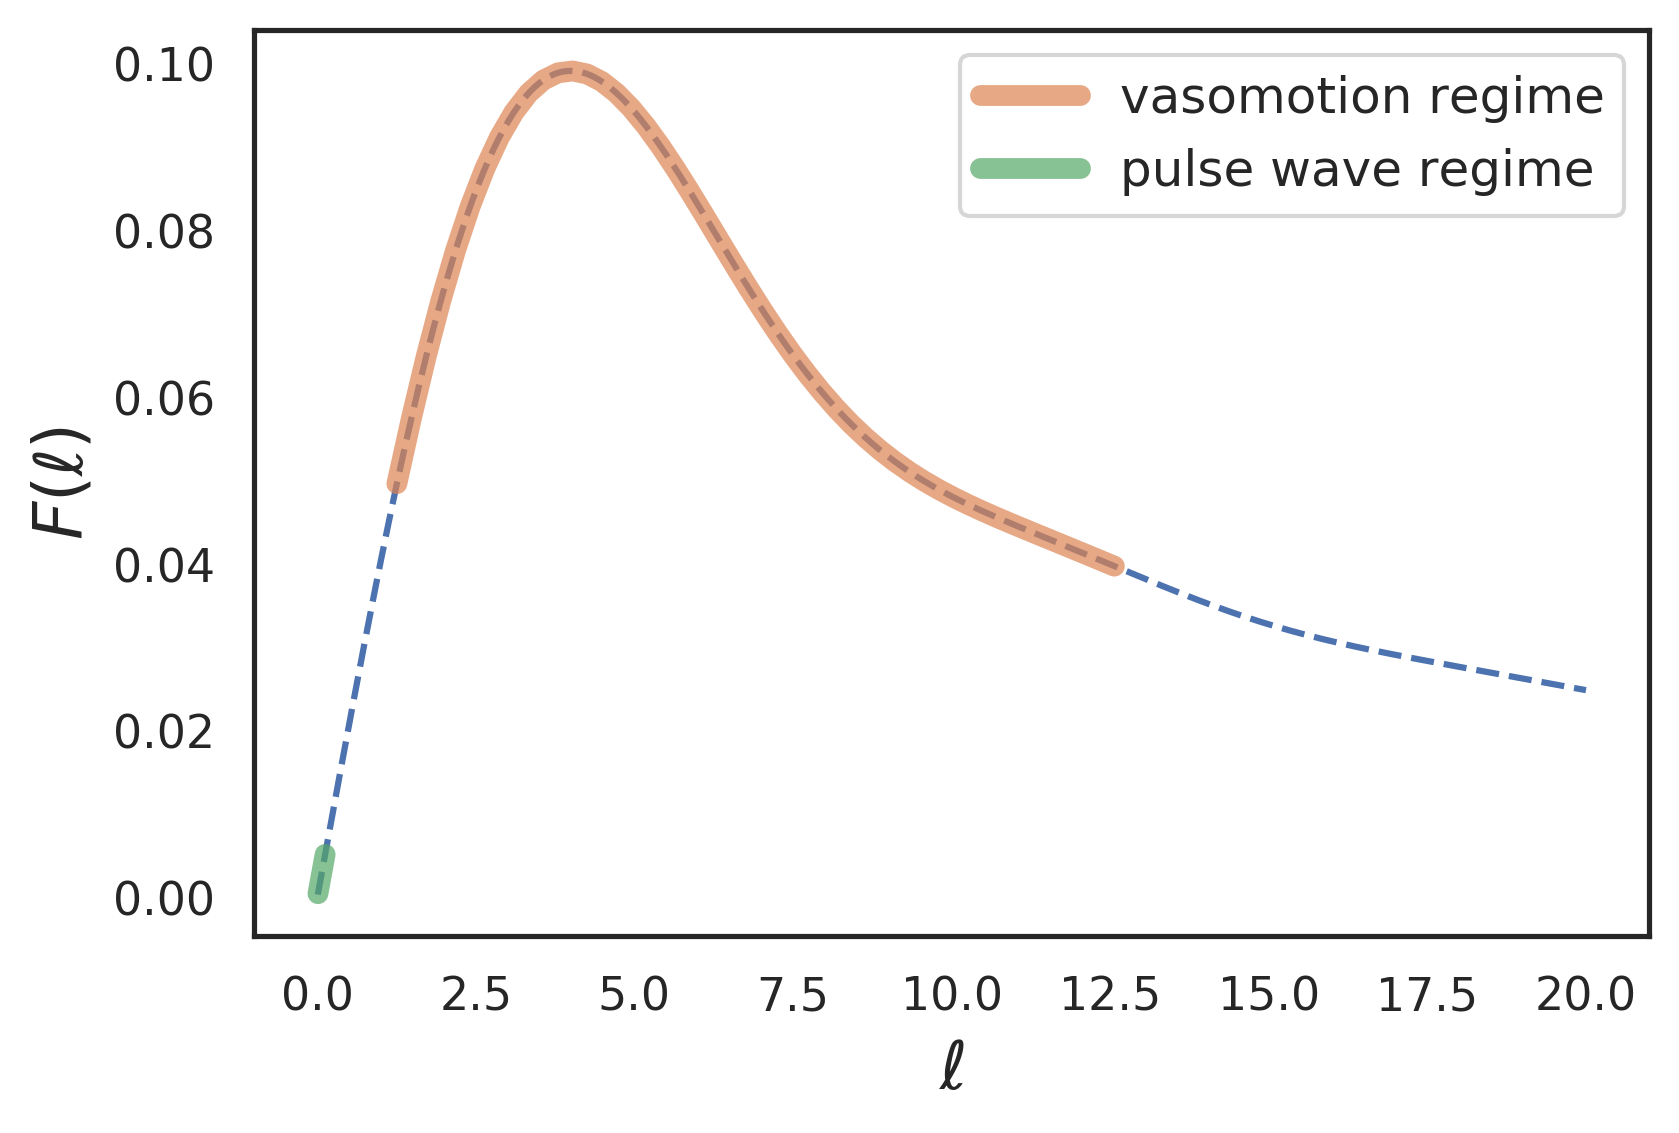

In [13]:
ls = np.linspace(0.01, 20, 500)
fs = [f(l) for l in ls]

plt.plot(ls, fs, '--')

l_vals = [perc*2*np.pi*L_mice/lamda_vaso_mice for perc in np.linspace(0.01, 0.1)]
f_vals = [f(l) for l in l_vals]
#plt.plot(l_vals, f_vals, '-', label='vasomotion, mice', linewidth=5, alpha=0.8)

l_vals = [perc*2*np.pi*L_rat/lamda_vaso_rat for perc in np.linspace(0.01, 0.1)]
f_vals = [f(l) for l in l_vals]
plt.plot(l_vals, f_vals, '-', label='vasomotion regime', linewidth=5, alpha=0.7)

l_vals = [perc*2*np.pi*L_human/lamda_pulse_human for perc in np.linspace(0.01, 0.1)]
f_vals = [f(l) for l in l_vals]
#plt.plot(l_vals, f_vals, '-', label='pulse, human', linewidth=5, alpha=0.8)

l_vals = [perc*2*np.pi*L_rat/lamda_pulse_rat for perc in np.linspace(0.01, 0.1)]
f_vals = [f(l) for l in l_vals]
plt.plot(l_vals, f_vals, '-', label='pulse wave regime', linewidth=5, alpha=0.7)

plt.xlabel('$\ell$', fontsize=16)
plt.ylabel('$F(\ell)$', fontsize=16)
plt.legend(fontsize=12)
plt.savefig('fl_cases.png')
